**Breast Cancer Classification Prediction**

---

Classification

In [2]:
import pandas as pd

df = pd.read_csv('/content/breast-cancer-wisconsin.data 2.txt', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.head(20)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [6]:
df.shape

(699, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df['Bare_Nuclei'].value_counts()

,count
Bare_Nuclei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9


In [9]:
df.describe(include = "all")

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [10]:
df.isnull().sum()

,0
Id,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [11]:
import numpy as np

df['Bare_Nuclei'].replace('?', 0, inplace=True)

df.isnull().sum()

,0
Id,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [12]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int')

In [13]:
df.head(100)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
95,1164066,1,1,1,1,2,1,3,1,1,2
96,1165297,2,1,1,2,2,1,1,1,1,2
97,1165790,5,1,1,1,2,1,3,1,1,2
98,1165926,9,6,9,2,10,6,2,9,10,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Id                           699 non-null    int64
 1   Clump_thickness              699 non-null    int64
 2   Uniformity_Cell_Size         699 non-null    int64
 3   Uniformity_Cell_Shape        699 non-null    int64
 4   Marginal_Adhesion            699 non-null    int64
 5   Single_Epithelial_Cell_Size  699 non-null    int64
 6   Bare_Nuclei                  699 non-null    int64
 7   Bland_Chromatin              699 non-null    int64
 8   Normal_Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [15]:
mean_bare = df['Bare_Nuclei'].mean()

df['Bare_Nuclei'].replace(0, df['Bare_Nuclei'].mean(), inplace=True)

df.head(10)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [17]:
df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098488,-0.060051,-0.052072,-0.034901,-0.080226
Clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587488,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686915,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709660,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665225,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581440,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.098488,0.587488,0.686915,0.709660,0.665225,0.581440,1.000000,0.675958,0.577378,0.338916,0.816284
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675958,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577378,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338916,0.344169,0.428336,1.000000,0.423170


In [18]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


In [19]:
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [20]:
X = df [['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]

#x2 = df.iloc[:, 1:-1].values
#y = df.iloc[:, -1].values

#x3 = df.drop('custcat', axis=1)

X.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1


In [21]:


y = df['Class'].values

Split train test

In [22]:

from sklearn.model_selection import train_test_split

#if you mention train_size (80%)
#mean that test_size (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


print (X_train.shape)
print (X_test.shape)

(559, 10)
(140, 10)


In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:5] #This part boleh skip


array([[ 0.10751925,  0.16488604, -0.38317451, -0.76069772, -0.64250678,
        -0.55496377, -0.71551955, -0.18320521, -0.60149186, -0.34972397],
       [ 0.05485438,  0.16488604, -0.05465526, -0.09627581,  0.40562928,
        -0.55496377,  0.10070202, -0.18320521,  0.39230306, -0.34972397],
       [ 0.22662408, -1.23695875, -0.71169376, -0.76069772, -0.29312809,
        -0.55496377, -0.71551955, -0.18320521, -0.60149186, -0.34972397],
       [ 0.37130019,  0.16488604, -0.71169376, -0.76069772, -0.64250678,
        -0.55496377, -0.71551955, -0.58640093, -0.60149186, -0.34972397],
       [ 0.17119619, -0.88649755, -0.71169376, -0.09627581, -0.29312809,
        -0.55496377, -0.71551955, -0.58640093, -0.60149186, -0.34972397]])

In [24]:
#Accuracy score

from sklearn.neighbors import KNeighborsClassifier

#the default parameter for KNeighborsClassifier() is 5 for if you want to change it you have to add the parameter
#KNeighborsClassifier(N=3)
neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluation
#here will use the accuracy score test
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn.metrics
print('The accuracy is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy is:  97.14285714285714


[0.94285714 0.92142857 0.97857143 0.96428571 0.97142857 0.96428571
 0.97142857 0.96428571 0.97142857]




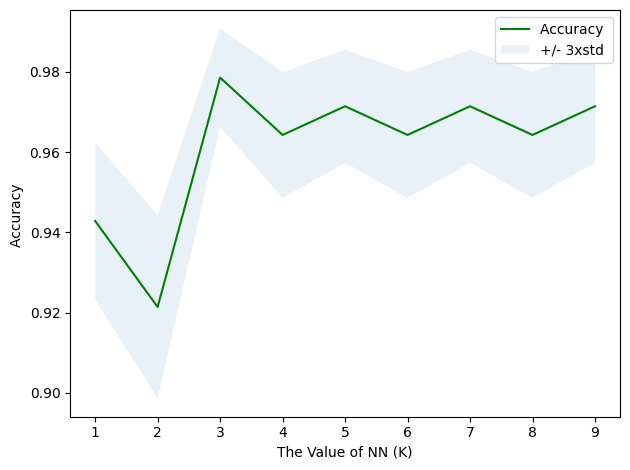



The best accuracy was with 0.9785714285714285 with k= 3


In [25]:

import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =10 #change the k value here, then the loop will start
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc) (activate code ni kalau nak semua mean)
print(mean_acc)

print ('')
print ('')

#this is to plot the data
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)

print('The confusion matrix is= ', cm)

print('')

print ('TP is ', cm[0][0])
print ('TN is ', cm[1][1])
print ('FP is ', cm[0][1])
print ('FN is ', cm[1][0])

The confusion matrix is=  [[94  1]
 [ 3 42]]

TP is  94
TN is  42
FP is  1
FN is  3


Check for Over fitting

In [27]:

print(' The accuracy based in training set is: ', neigh.score(X_train,y_train))
print(' The accuracy based in test set is: ', neigh.score(X_test, y_test))

 The accuracy based in training set is:  0.9660107334525939
 The accuracy based in test set is:  0.9714285714285714


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



**Precision:** it the relationship (ratio) of corretly predicted positive (TP) to the total prediction of positive (TP + FP)

TP/ (TP + FP) (how confused is the model about the right prediction / how well known the model into getting the right answer)
Recall: TP / (TP + FN) (how good the model in recalling the right answer, the right prediction)

**Think of it this way:**

* Precision: Out of all the times the model predicted a positive result, how many were actually correct? Focuses on minimizing false positives.

* Recall: Out of all the actual positive instances, how many did the model correctly identify? Focuses on minimizing false negatives.

* Precision: How good are you at NOT making mistakes when you find someone? (Not yelling "Found you!" when no one is there.)

* Recall: How good are you at finding ALL the people hiding?